# Maquinas de Soporte Vectorial SVM:
Es un algoritmo de aprendizaje automático supervisado que se puede utilizar para problemas de clasificación o regresión. Pero generalmente se usa para clasificar. Dadas 2 o más clases de datos etiquetadas, actúa como un clasificador discriminativo, definido formalmente por un hiperplano óptimo que separa todas las clases. Los nuevos ejemplos que luego se mapean en ese mismo espacio se pueden clasificar según el lado de la brecha en que se encuentran.

Como regla general, las SVM son excelentes para conjuntos de datos relativamente pequeños con menos valores atípicos.
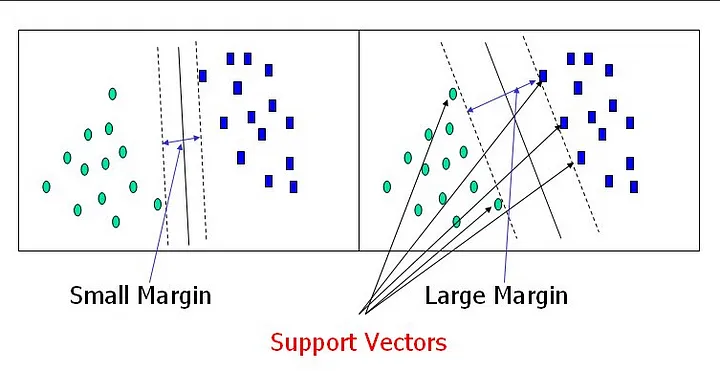
Los vectores de soporte son los puntos de datos más cercanos al hiperplano, los puntos de un conjunto de datos que, si se eliminan, alterarían la posición del hiperplano en división. Debido a esto, pueden considerarse los elementos críticos de un conjunto de datos, son los que nos ayudan a construir nuestra SVM.

### Ahora, ¿Qué es un hiperplano?
Un hiperplano es un subespacio de una dimensión menos que su espacio ambiental. Por ejemplo, un hiperplano de un espacio n-dimensional es un subconjunto plano con dimensión n — 1. Por su naturaleza, separa el espacio en dos medios espacios.
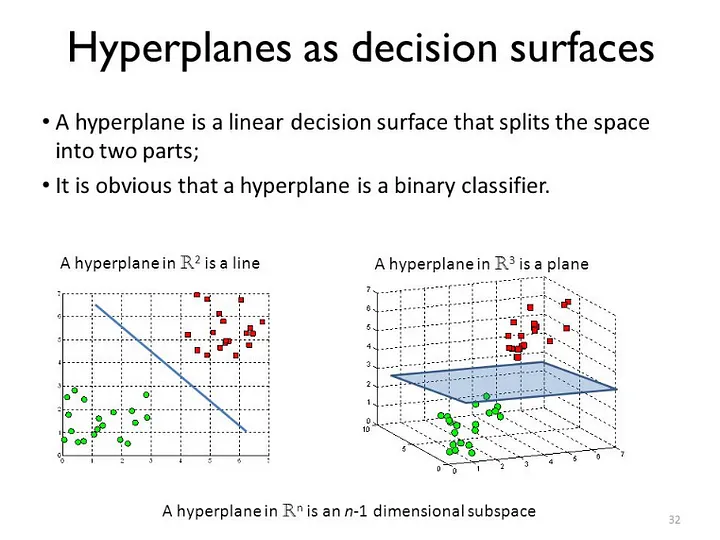

### Como funcionan las SVM:
 Imaginemos que tenemos dos etiquetas: rojos y azules , y nuestros datos tiene dos características : x e y . Queremos un clasificador que, dado un par de coordenadas (x, y) , dé como resultado si es rojo o azul.
Una máquina de vectores de soporte toma estos puntos de datos y genera el hiperplano. Todo lo que caiga a un lado lo clasificaremos como azul y todo lo que caiga al otro lado como rojo.
Pero, ¿cuál es exactamente el mejor hiperplano? Para SVM, es el que maximiza los márgenes de ambas etiquetas.
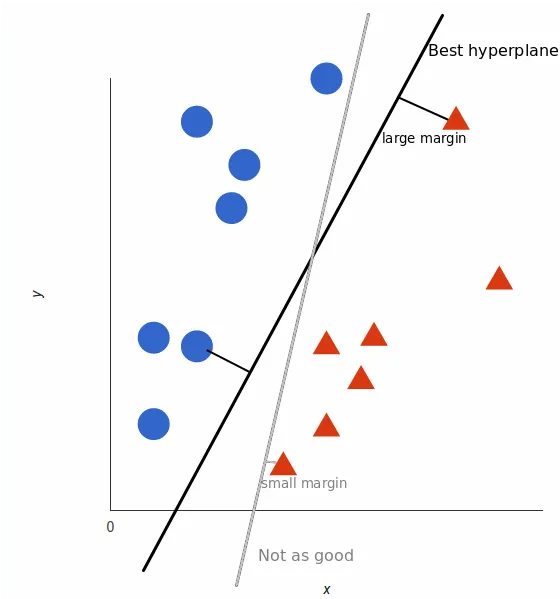






# Ejemplo 1

In [10]:
#Declaramos las variables
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [11]:
#cargamos los datos en el dataset iris
iris = load_iris()

In [12]:
dir(iris) #con este comando vemos los atributos de iris 

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
iris.target_names #

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
#Aqui creamos y llenamos el dataframe con los columnas que queramos
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
#Ahora le añadimos una columna mas llamada target
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [18]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [19]:
#Añadimos un anueva columna con el nombre de la flor, usamos una funcion lambda
df[ 'flower_name' ] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [20]:
df0= df[df.target==0]
df1= df[df.target==1]#aqui usamos 3 dataframesdiferentes para poder visualizar la diferencia entre las especies de flores
df2= df[df.target==2]

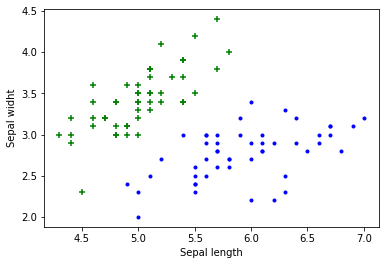

In [21]:
#Aqui podemos ver la clasificacion de las plantas 
plt.xlabel('Sepal length')
plt.ylabel('Sepal widht')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker='.')

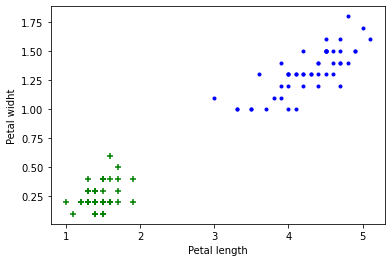

In [22]:
#Hacemos lo mismo pero para el petalo que tienen las plantas 
plt.xlabel('Petal length')
plt.ylabel('Petal widht')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue', marker='.')

In [23]:
x = df.drop(['target', 'flower_name'], axis='columns')
y = df.target

In [24]:
#Aqui separamos el dataset en datos de entrenamiento y de prueba, el tamaño 
#del test es del 20% o sea 70% entrenamiento 20% prueba
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
len(x_train), len(x_test)

(120, 30)

In [26]:
#inicializamos nuestro modelo
model = SVC()

In [27]:
#LLamamos al metodo FIT para entrenar el modelo
model.fit(x_train, y_train)

SVC()

In [28]:
#Para ver la presicion del modelo usamos metodo score
model.score(x_test, y_test)

0.9666666666666667

In [29]:
#ahora predecimos conforme otros parametros con algunos datos randmo
model.predict([[5.2,4.0,6.4,2.4]])

C:\Users\macha\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

# EJEMPLOS 2


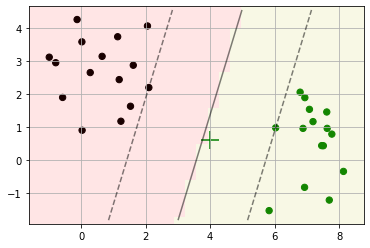

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib

# generamos 30 muestras con dos características, asociadas a dos clases
X, y = make_blobs(n_samples=30, n_features=2, centers=2, random_state=21,center_box=(0, 10.0))

# Creamos el modelo SVM para clasificación con kernel lineal y entrenamos el modelo
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)

# Graficamos los datos en el espacio de caracteríticas
cmap   = matplotlib.colors.ListedColormap( [ 'k', 'g' ] )
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,cmap=cmap)

#  Esta parte basicamente nos permite generar o graficar el hiperplano
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Graficamos el hiperplano y el margen
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

# Graficamos los vectores soporte
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', edgecolors='k')
Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)

cmap   = matplotlib.colors.ListedColormap( [ 'r', 'y' ] )
plt.pcolormesh(XX, YY, Z_pred,cmap = cmap,alpha=0.1)

new_x = [[4,0.6]]
new_z = clf.predict(new_x)
if new_z[0]==0: color='k'
else: color='g'
plt.scatter(new_x[0][0],new_x[0][1] , marker = '+',color=color,s=300)
plt.grid()
plt.show()

## Problema de clases linealmentes no separables

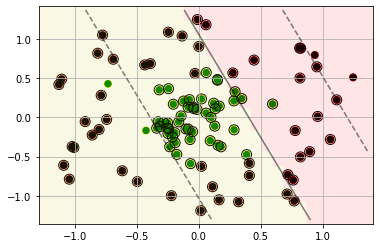

In [7]:
# Veamos el uso de kernels para el problema de clases linealmente no separables
from sklearn.datasets import make_circles

# generamos 100 muestras con dos características, asociadas a dos clases
X, y = make_circles(100, factor=.2, noise=.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Creamos el modelo SVM para clasificación con kernel lineal/rbf y entrenamos el modelo
clf = svm.SVC(kernel='linear', C=100).fit(X, y)

# Graficamos los datos en el espacio de caracteríticas
cmap   = matplotlib.colors.ListedColormap( [ 'k', 'g' ] )
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,cmap=cmap)

#  Creamos un mesh para evaluar la función de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Graficamos el hiperplano y el margen
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

# Graficamos los vectores soporte
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', edgecolors='k')

Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)

cmap   = matplotlib.colors.ListedColormap( [ 'r', 'y' ] )
plt.pcolormesh(XX, YY, Z_pred,cmap = cmap,alpha=0.1)

plt.grid()
plt.show()

## Truco Kernel

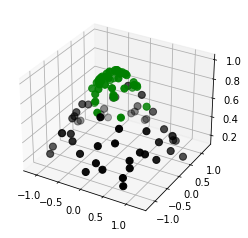

In [8]:
# Veamos el efecto del truco kernel (aumentando la dimensionalidad del espacio de entradas)
from mpl_toolkits import mplot3d

# Aplicamos una operación de kernel gaussiano para separar las clases
# Gamma controla el efecto del kernel, si es muy pequeño el modelo se parece al lineal
gamma = 1
Xr = np.exp(-gamma*(X ** 2).sum(1))

# Graficamos el espacio de características mapeado por el kernel
ax = plt.subplot(projection='3d')
cmap   = matplotlib.colors.ListedColormap( [ 'k', 'g' ] )
ax.scatter3D(X[:, 0], X[:, 1], Xr, c=y, s=50, cmap=cmap)

# Conclusiones
Lo que hace una SVM es averiguar la “mejor” línea para dividir los puntos, que es la línea que deja la mayor brecha entre ella y los puntos. Esa línea se llama hiperplano de margen máximo, porque es un hiperplano que separa los lados dejando el margen máximo.

tambien resulta que la mayoría de los puntos realmente no importan cuando averiguas dónde colocar la línea, porque están muy lejos de ella. Solo los puntos cercanos importan, y debido a que “apoyan” la ubicación de la línea, los llamamos vectores de soporte. Gracias a la matemática, ni siquiera necesita calcular dónde está esta línea / plano para averiguar de qué lado están las cosas; todo lo que necesita son estos vectores de soporte.

# Análisis del método SVM
El método de Máquinas de Soporte Vectorial (SVM) es un algoritmo de aprendizaje supervisado utilizado tanto para problemas de clasificación como de regresión. Se destaca por su capacidad para encontrar un hiperplano óptimo que mejor separe las clases en un espacio multidimensional.

#### 1.Funcionamiento básico:

Clasificación: En su forma más simple, SVM busca el hiperplano que maximiza el margen entre las clases en un espacio de características. Este hiperplano se encuentra tratando de optimizar la separación entre las clases, utilizando los vectores de soporte (puntos de datos cercanos al hiperplano de separación).
Regresión: Además de la clasificación, SVM puede usarse para problemas de regresión ajustando un hiperplano para predecir valores numéricos.

#### 2.Kernel Trick:

La flexibilidad de SVM radica en su capacidad para manejar datos no linealmente separables mediante el kernel trick.
Los kernels permiten proyectar los datos a un espacio de mayor dimensionalidad donde la separación lineal es posible. Los más comunes son lineal, polinomial, gaussiano (RBF), entre otros.

#### 3.Selección del Hiperplano Óptimo:

SVM encuentra el hiperplano óptimo que maximiza el margen entre clases. Maximizar este margen ayuda a reducir el sobreajuste y generalizar mejor con datos nuevos.
Cuando las clases no pueden separarse linealmente, SVM busca el hiperplano que minimiza una función de costo con términos de penalización por clasificaciones erróneas (a través de las variables de holgura o slack variables).

#### 4.Ventajas:

Efectivo en espacios de alta dimensión, lo que lo hace útil en problemas con muchas características.
Funciona bien para conjuntos de datos pequeños a medianos.
Buena generalización con baja probabilidad de sobreajuste.
La capacidad de manejar el kernel trick lo hace aplicable a una amplia gama de problemas.

#### 5.Desafíos:

Elección del kernel: La selección del kernel y la configuración de sus parámetros pueden afectar significativamente el rendimiento del modelo.
Ineficiente con grandes conjuntos de datos, ya que el tiempo de entrenamiento puede ser alto.
No es directamente aplicable a problemas con múltiples clases (aunque se pueden usar estrategias de uno contra todos o uno contra uno).

#### 6.Aplicaciones:

1Clasificación de imágenes y texto.
2Predicción de series temporales.
3Detección de anomalías.
4Análisis bioinformático, entre otros.

## Fortalezas:
 ➤Efectivo en espacios de alta dimensión: Es eficaz incluso cuando el número de características es mayor que el número de muestras. Esto lo hace útil en problemas con muchos atributos, como en el procesamiento de imágenes o texto.

 ➤Buena generalización: Tiende a tener una baja probabilidad de sobreajuste, especialmente en conjuntos de datos pequeños a medianos.

 ➤Versatilidad con el kernel trick: Puede manejar datos no linealmente separables mediante el uso de funciones de kernel para transformarlos a un espacio de mayor dimensionalidad.

## Debilidades:
 ➤Sensible a la elección del kernel y parámetros: El rendimiento del SVM depende significativamente de la selección del kernel y la configuración de sus parámetros. La elección inadecuada puede llevar a un mal rendimiento del modelo.

 ➤Ineficiente con grandes conjuntos de datos: El tiempo de entrenamiento puede ser alto con conjuntos de datos masivos, lo que limita su escalabilidad en ciertos casos.

 ➤No directamente aplicable a problemas de múltiples clases: Aunque se pueden emplear estrategias (uno contra todos, uno contra uno), no tiene una extensión natural a problemas de clasificación multiclase.

## Parámetros:
 ➤Kernel: El tipo de kernel a utilizar (lineal, polinomial, gaussiano, etc.) determina la capacidad del modelo para manejar la separación no lineal.

 ➤Parámetros del kernel: Por ejemplo, para el kernel gaussiano, el parámetro gamma controla la influencia del kernel y puede afectar la suavidad del límite de decisión.

 ➤Parámetro de regularización (C): Controla el balance entre maximizar el margen y minimizar las clasificaciones erróneas. Valores más altos de C permiten clasificaciones erróneas reducidas, pero pueden llevar a un sobreajuste.

 ➤Grado (para kernel polinomial): En el caso de un kernel polinomial, el parámetro de grado controla el grado del polinomio utilizado para la transformación.